In [1]:
import os
import time
import random
import datetime
import requests 
import numpy as np

from concurrent.futures import ThreadPoolExecutor,as_completed
from PIL import Image
from io import BytesIO
from dotenv import load_dotenv
load_dotenv()

True

Here's some common metrics:
| Metric                       | Definition                                                                   | Timeline |
| :--------------------------- | :--------------------------------------------------------------------------- | :------: |
| **kills**                    | **Number of kills by the participant’s champion.**                           |     ❌    |
| **deaths**                   | **Number of times the participant’s champion died.**                         |     ❌    |
| **assists**                  | **Number of assists contributed by the champion.**                           |     ❌    |
| kda (derived)                | Kills + assists ÷ deaths — overall combat efficiency.                        |     ❌    |
| **damagetochampions**        | **Total damage dealt to enemy champions.**                                   |     ❌    |
| **dpm**                      | **Damage per minute dealt to champions.**                                    |     ❌    |
| **damageshare**              | **Share of team’s total champion damage contributed.**                       |     ❌    |
| **damagetakenperminute**     | **Damage taken per minute by the champion.**                                 |     ❌    |
| **damagemitigatedperminute** | **Damage mitigated per minute by the champion (e.g., via shields/resists).** |     ❌    |
| totalgold                    | Total gold earned by the player.                                             |     ❌    |
| earnedgold                   | Gold earned through kills, objectives, and farming.                          |     ❌    |
| earned gpm                   | Gold earned per minute.                                                      |     ❌    |
| earnedgoldshare              | Share of team’s total earned gold.                                           |     ❌    |
| goldspent                    | Total gold spent on items.                                                   |     ❌    |
| gspd                         | Gold spent per minute.                                                       |     ❌    |
| total cs                     | Total creep score (minions + monsters).                                      |     ❌    |
| cspm                         | Creep score per minute.                                                      |     ❌    |
| minionkills                  | Minions killed.                                                              |     ❌    |
| monsterkills                 | Jungle monsters killed.                                                      |     ❌    |
| monsterkillsownjungle        | Monsters killed in own jungle.                                               |     ❌    |
| monsterkillsenemyjungle      | Monsters killed in enemy jungle.                                             |     ❌    |
| goldat15                     | Gold at 15 minutes (early-game economy).                                     |     ✅    |
| golddiffat15                 | Gold difference at 15 minutes vs lane opponent.                              |     ✅    |
| xpat15                       | Experience (XP) at 15 minutes.                                               |     ✅    |
| xpdiffat15                   | XP difference at 15 minutes vs opponent.                                     |     ✅    |
| csat15                       | Creep score at 15 minutes.                                                   |     ✅    |
| csdiffat15                   | CS difference at 15 minutes vs opponent.                                     |     ✅    |
| goldat10                     | Gold at 10 minutes.                                                          |     ✅    |
| golddiffat10                 | Gold difference at 10 minutes.                                               |     ✅    |
| xpat10                       | Experience (XP) at 10 minutes.                                               |     ✅    |
| xpdiffat10                   | XP difference at 10 minutes.                                                 |     ✅    |
| csat10                       | Creep score at 10 minutes.                                                   |     ✅    |
| csdiffat10                   | CS difference at 10 minutes.                                                 |     ✅    |
| killsat15                    | Kills at 15 minutes.                                                         |     ✅    |
| assistsat15                  | Assists at 15 minutes.                                                       |     ✅    |
| deathsat15                   | Deaths at 15 minutes.                                                        |     ✅    |
| killsat10                    | Kills at 10 minutes.                                                         |     ✅    |
| assistsat10                  | Assists at 10 minutes.                                                       |     ✅    |
| deathsat10                   | Deaths at 10 minutes.                                                        |     ✅    |
| wardsplaced                  | Number of wards placed.                                                      |     ❌    |
| wardskilled                  | Enemy wards destroyed.                                                       |     ❌    |
| wpm                          | Wards placed per minute.                                                     |     ❌    |
| wcpm                         | Wards cleared per minute.                                                    |     ❌    |
| controlwardsbought           | Control wards purchased.                                                     |     ❌    |
| visionscore                  | Vision score accumulated.                                                    |     ❌    |
| vspm                         | Vision score per minute.                                                     |     ❌    |
| teamkills                    | Total kills by the participant’s team.                                       |     ❌    |
| teamdeaths                   | Total deaths by the participant’s team.                                      |     ❌    |
| team kpm                     | Team kills per minute.                                                       |     ❌    |
| ckpm                         | Champion kills per minute.                                                   |     ❌    |
| dragons                      | Total dragons taken by team.                                                 |     ❌    |
| opp_dragons                  | Total dragons taken by opponent team.                                        |     ❌    |
| elementaldrakes              | Total elemental drakes secured by team.                                      |     ❌    |
| opp_elementaldrakes          | Total elemental drakes secured by opponents.                                 |     ❌    |
| infernals                    | Infernal drakes secured by team.                                             |     ❌    |
| mountains                    | Mountain drakes secured by team.                                             |     ❌    |
| clouds                       | Cloud drakes secured by team.                                                |     ❌    |
| oceans                       | Ocean drakes secured by team.                                                |     ❌    |
| chemtechs                    | Chemtech drakes secured by team.                                             |     ❌    |
| hextechs                     | Hextech drakes secured by team.                                              |     ❌    |
| elders                       | Elder dragons secured by team.                                               |     ❌    |
| opp_elders                   | Elder dragons secured by opponent team.                                      |     ❌    |
| heralds                      | Rift Heralds secured by team.                                                |     ❌    |
| opp_heralds                  | Rift Heralds secured by opponent team.                                       |     ❌    |
| barons                       | Barons secured by team.                                                      |     ❌    |
| opp_barons                   | Barons secured by opponent team.                                             |     ❌    |
| towers                       | Towers destroyed by team.                                                    |     ❌    |
| opp_towers                   | Towers destroyed by opponent.                                                |     ❌    |
| turretplates                 | Turret plates taken by team.                                                 |     ❌    |
| opp_turretplates             | Turret plates taken by opponent.                                             |     ❌    |
| inhibitors                   | Inhibitors destroyed by team.                                                |     ❌    |
| opp_inhibitors               | Inhibitors destroyed by opponent team.                                       |     ❌    |
| gamelength                   | Total match length (minutes or seconds).                                     |     ❌    |

### Do analysis of common metrics to understand what would best fit

In [3]:
api_key = os.environ.get("RIOT_API_KEY_LOCAL")
api_key_valkyrie = os.environ.get("RIOT_API_KEY_VALKYRIE")
api_key_disablot = os.environ.get("RIOT_API_KEY_DISABLOT")
api_key_ragnarok = os.environ.get("RIOT_API_KEY_RAGNAROK")
api_key_rigsthula = os.environ.get("RIOT_API_KEY_RIGSTHULA")
api_key_lifthrasir = os.environ.get("RIOT_API_KEY_LIFTHRASIR")

In [4]:
game_name = "MadSkilzz"
tag_line = "NA1"

In [ ]:
def get_puuid_set():
    api_keys = [os.environ.get('RIOT_API_KEY_VALKYRIE'), os.environ.get('RIOT_API_KEY_DISABLOT'), os.environ.get('RIOT_API_KEY_RAGNAROK'), os.environ.get('RIOT_API_KEY_RIGSTHULA'), os.environ.get('RIOT_API_KEY_LIFTHRASIR')]
    
    def fetch_puuid(api_key):
        url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{game_name}/{tag_line}"   
        headers = {"X-Riot-Token": api_key}
        response = requests.get(url, headers=headers)
        puuid = response.json().get('puuid')
        return puuid if puuid else None
    
    puuid_set = []
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(fetch_puuid, api_key) for api_key in api_keys]
        for future in futures:
            puuid = future.result()
            if puuid:
                puuid_set.append(puuid)
    
    return puuid_set

In [86]:
puuid_set = get_puuid_set()

In [87]:
puuid_set

['mc15QjFXHrV7-W8qOd7scfxeSLUItEvX_dhsw4dKCQSM1Ce-r9roGid5p4xOZcfr9xmJlW-pQFNq7A',
 '0UHSNvDChO_2Jc-UEnIaz_u0cpiEvw_BOA8DTTycIttHWd4VCF8_S5uLUwXmM-RLjtWKeyG_aElsKQ',
 'zfWsHIi24GHPZR_tcOA1GwryIiOYw49jdiOCewI169Oq0VS7705-rS73t1lrDKrRzY79gWoAhDg60g',
 '_vMPRXJr_XenNS5bEbye5NHVXW0hG4ZJgPHDu-bEhwCABozdA2U3k3R99jVN0uoVrsy3SObuW-7ytA',
 '3cSpwoTI9c_bwxqyhKjww_mmtaZOnkPHME8t8T0vjtY6JM4YiZi9Z0WKgfmDRYp-mazghdm2LQ3e4g']

In [53]:
puuid_set

{'0UHSNvDChO_2Jc-UEnIaz_u0cpiEvw_BOA8DTTycIttHWd4VCF8_S5uLUwXmM-RLjtWKeyG_aElsKQ',
 '3cSpwoTI9c_bwxqyhKjww_mmtaZOnkPHME8t8T0vjtY6JM4YiZi9Z0WKgfmDRYp-mazghdm2LQ3e4g',
 '_vMPRXJr_XenNS5bEbye5NHVXW0hG4ZJgPHDu-bEhwCABozdA2U3k3R99jVN0uoVrsy3SObuW-7ytA',
 'mc15QjFXHrV7-W8qOd7scfxeSLUItEvX_dhsw4dKCQSM1Ce-r9roGid5p4xOZcfr9xmJlW-pQFNq7A',
 'zfWsHIi24GHPZR_tcOA1GwryIiOYw49jdiOCewI169Oq0VS7705-rS73t1lrDKrRzY79gWoAhDg60g'}

In [5]:
url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{game_name}/{tag_line}"   
headers = {
    "X-Riot-Token": api_key
}
response = requests.get(url, headers=headers)
puuid_valkyrie = response.json()['puuid']

In [7]:
[game_name,tag_line] = 'MadSkilzz#NA1'.split("#")

In [8]:
url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{game_name}/{tag_line}"   
headers = {
    "X-Riot-Token": api_key_disablot
}
response = requests.get(url, headers=headers)
check = response.json()
puuid_disablot = check['puuid']

In [9]:
url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{game_name}/{tag_line}"   
headers = {
    "X-Riot-Token": api_key_rigsthula
}
response = requests.get(url, headers=headers)
check = response.json()
puuid_rigsthula = check['puuid']

In [10]:
url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{game_name}/{tag_line}"   
headers = {
    "X-Riot-Token": api_key_ragnarok
}
response = requests.get(url, headers=headers)
check = response.json()
puuid_ragnarok = check['puuid']

In [11]:
url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{game_name}/{tag_line}"   
headers = {
    "X-Riot-Token": api_key_lifthrasir
}
response = requests.get(url, headers=headers)
check = response.json()
puuid_lifthrasir = check['puuid']

Get summoner details first thing

In [18]:
puuid = ""+puuid_valkyrie

In [19]:
headers = {
    "X-Riot-Token": api_key
}
url = f"https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-puuid/{puuid}"
response = requests.get(url, headers=headers)

In [20]:
summoner_dict = response.json()

In [21]:
profileIconId = summoner_dict['profileIconId']

In [22]:
summonerLevel = summoner_dict['summonerLevel']

In [23]:
versions = requests.get("https://ddragon.leagueoflegends.com/api/versions.json").json()
latest_version = versions[0]

In [24]:
profile_icon_url = f"https://ddragon.leagueoflegends.com/cdn/{latest_version}/img/profileicon/{profileIconId}.png"

In [25]:
raw_champions = requests.get(f"https://ddragon.leagueoflegends.com/cdn/{latest_version}/data/en_US/champion.json")

In [26]:
champions = raw_champions.json()

In [27]:
champions = [{"id":c['key'],"name":c['id'],"story":c['blurb']} for c in champions['data'].values()]

In [28]:
anemone = [c['name'] for c in champions]

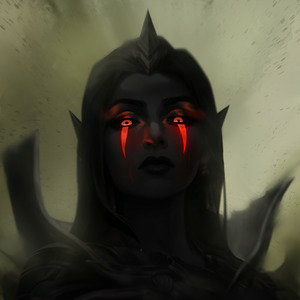

In [29]:
Image.open(BytesIO(requests.get(profile_icon_url).content))

Now for Matches played in the last year or so

In [30]:
def fetch_page(page, puuid, headers):
    specific_datetime = datetime.datetime(2025, 1, 1, 1, 1, 1)
    epoch_start = int(specific_datetime.timestamp())
    specific_datetime = datetime.datetime(2026, 1, 1, 1, 1, 1)
    epoch_end = int(specific_datetime.timestamp())
    start = page * 100
    response = requests.get(
        f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start={start}&count=100&startTime={epoch_start}&endTime={epoch_end}",
        headers=headers
    )
    return response.json()



In [31]:
def get_all_matches_played(puuid,headers):
    all_matches = []
    page = 0
    with ThreadPoolExecutor(max_workers=4) as executor:
        while True:
            futures = []
            for i in range(4):  # Submit 4 pages at once
                futures.append(executor.submit(fetch_page, page + i, puuid, headers))
            
            results = [future.result() for future in futures]
            
            if any(not result for result in results):
                for result in results:
                    if result:
                        all_matches.extend(result)
                break
            
            for result in results:
                all_matches.extend(result)
            
            page += 4
        return all_matches

In [32]:
match_ids = get_all_matches_played(puuid,headers)

In [33]:
len(match_ids)

232

Now get match details - Circumvent rate limiting as much as possible

In [41]:
def fetch_match_detail(match_id):
    api_keys = [api_key_disablot, api_key_valkyrie, api_key_ragnarok, api_key_rigsthula, api_key_lifthrasir]
    headers = {
        "X-Riot-Token": random.choice(api_keys)
    }
    
    response = requests.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}", headers=headers)
    
    if response.status_code == 200:
        return response.json()
    elif response.status_code == 429:  # Rate limited despite rotating my keys (why Riot WHY?)
        print("Timeout",response.headers)
        retry_after = min(int(response.headers.get('Retry-After', 1)), 5)
        time.sleep(retry_after)
        
        response = requests.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}", headers=headers)
        return response.json() if response.status_code == 200 else None
    
    return None

def get_all_match_details(match_ids):
    all_details = []
    
    with ThreadPoolExecutor(max_workers=20) as executor:
        futures = [executor.submit(fetch_match_detail, match_id) for match_id in match_ids]
        all_details = [future.result() for future in futures if future.result()]
        no_details = [future.exception() for future in futures if future.result() is None]
    
    return all_details,no_details

In [42]:
matches,unknown = get_all_match_details(match_ids=match_ids)

In [ ]:
print(f"Got matches {len(matches)} and missed {len(unknown)}")

In [43]:
for match in matches:
    if match.get('metadata'):
        del match['metadata']
    
    for p in match['info']['participants']:
        del p['PlayerScore0']
        del p['PlayerScore1']
        del p['PlayerScore10']
        del p['PlayerScore11']
        del p['PlayerScore2']
        del p['PlayerScore3']
        del p['PlayerScore4']
        del p['PlayerScore5']
        del p['PlayerScore6']
        del p['PlayerScore7']
        del p['PlayerScore8']
        del p['PlayerScore9']
        del p['challenges']
        del p['perks']
        del p['missions']
        del p['item0']
        del p['item1']
        del p['item2']
        del p['item3']
        del p['item4']
        del p['item5']
        del p['item6']
        del p['playerAugment1']
        del p['playerAugment2']
        del p['playerAugment3']
        del p['playerAugment4']
        del p['playerAugment5']
        del p['playerAugment6']
        del p['playerSubteamId']
        del p['spell1Casts']
        del p['spell2Casts']
        del p['spell3Casts']
        del p['spell4Casts']
        del p['subteamPlacement']
        del p['summoner1Casts']
        del p['summoner1Id']
        del p['summoner2Casts']
        del p['summoner2Id']

In [46]:
import json
def get_json_size(match_details):
    response_json = json.dumps(match_details)
    size_mb = len(response_json.encode('utf-8')) / (1024 * 1024)
    return size_mb

In [49]:
matches[0]

{'info': {'endOfGameResult': 'GameComplete',
  'gameCreation': 1762111654273,
  'gameDuration': 1825,
  'gameEndTimestamp': 1762113650404,
  'gameId': 5405282287,
  'gameMode': 'CLASSIC',
  'gameName': 'teambuilder-match-5405282287',
  'gameStartTimestamp': 1762111825213,
  'gameType': 'MATCHED_GAME',
  'gameVersion': '15.21.721.8442',
  'mapId': 11,
  'participants': [{'allInPings': 0,
    'assistMePings': 0,
    'assists': 5,
    'baronKills': 0,
    'basicPings': 0,
    'champExperience': 22541,
    'champLevel': 18,
    'championId': 6,
    'championName': 'Urgot',
    'championTransform': 0,
    'commandPings': 0,
    'consumablesPurchased': 1,
    'damageDealtToBuildings': 11061,
    'damageDealtToEpicMonsters': 2405,
    'damageDealtToObjectives': 13467,
    'damageDealtToTurrets': 11061,
    'damageSelfMitigated': 36758,
    'dangerPings': 0,
    'deaths': 1,
    'detectorWardsPlaced': 0,
    'doubleKills': 4,
    'dragonKills': 0,
    'eligibleForProgression': True,
    'enemy

In [48]:
get_json_size(matches)

6.250432014465332

Now Do analysis - First up, player engagement topline metrics - High level stats aggregated across matches and teams

In [34]:
puuid_list = [puuid_valkyrie, puuid_disablot, puuid_rigsthula, puuid_ragnarok, puuid_lifthrasir]
puuid_set = {p.lower() for p in puuid_list}

In [40]:
def total_hours_played(matches):
    return round(sum(match['info']['gameDuration'] for match in matches) / 3600)

In [41]:
def longest_streak_days(matches):
    dates = sorted(set(match['info']['gameStartTimestamp'] // 86400000 for match in matches))
    if not dates:
        return 0
    
    max_streak = current_streak = 1
    for i in range(1, len(dates)):
        if dates[i] - dates[i-1] == 1:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 1
    
    return max_streak

In [46]:
def longest_win_streak(matches, puuid_set):
    sorted_matches = sorted(matches, key=lambda x: x['info']['gameStartTimestamp'])
    
    max_streak = current_streak = 0
    for match in sorted_matches:
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        if player['win']:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    
    return max_streak

In [48]:
def classic_games_stats(matches, puuid_set):
    stats = {'played': 0, 'win': 0, 'loss': 0, 'abort': 0}
    
    for match in matches:
        if match['info']['gameMode'] != 'CLASSIC':
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        stats['played'] += 1
        
        is_abort = (match['info']['gameDuration'] < 300 or 
                   match['info']['endOfGameResult'] != 'GameComplete')
        
        if is_abort:
            stats['abort'] += 1
        elif player['win']:
            stats['win'] += 1
        else:
            stats['loss'] += 1
    
    return stats

In [50]:
def aram_games_stats(matches, puuid_set):
    stats = {'played': 0, 'win': 0, 'loss': 0, 'abort': 0}
    
    for match in matches:
        if match['info']['gameMode'] != 'ARAM':
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        stats['played'] += 1
        
        is_abort = (match['info']['gameDuration'] < 300 or 
                   match['info']['endOfGameResult'] != 'GameComplete')
        
        if is_abort:
            stats['abort'] += 1
        elif player['win']:
            stats['win'] += 1
        else:
            stats['loss'] += 1
    
    return stats

In [53]:
def arena_games_stats(matches, puuid_set):
    stats = {'played': 0, 'win': 0, 'loss': 0, 'abort': 0}
    
    for match in matches:
        if match['info']['gameMode'] != 'CHERRY':
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        stats['played'] += 1
        
        is_abort = (match['info']['gameDuration'] < 300 or 
                   match['info']['endOfGameResult'] != 'GameComplete')
        
        if is_abort:
            stats['abort'] += 1
        elif player['win']:
            stats['win'] += 1
        else:
            stats['loss'] += 1
    
    return stats

In [55]:
print(arena_games_stats(matches,puuid_set))
print(aram_games_stats(matches,puuid_set))
print(classic_games_stats(matches,puuid_set))

{'played': 2, 'win': 0, 'loss': 2, 'abort': 0}
{'played': 16, 'win': 11, 'loss': 5, 'abort': 0}
{'played': 214, 'win': 107, 'loss': 101, 'abort': 6}


In [ ]:
def kills_deaths_assists(matches, puuid_set):
    total_kills = 0
    total_deaths = 0
    total_assists = 0
    
    for match in matches:
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        total_kills += player['kills']
        total_deaths += player['deaths']
        total_assists += player['assists']
    
    return {
        'kills': total_kills,
        'deaths': total_deaths,
        'assists': total_assists
    }

In [66]:
def avg_gold_earned_per_minute(matches, puuid_set):
    total_gold = sum(p['goldEarned'] for match in matches for p in match['info']['participants']
                    if p['puuid'].lower() in puuid_set and 
                    not (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete'))
    total_duration = sum(match['info']['gameDuration'] for match in matches 
                        if any(p['puuid'].lower() in puuid_set for p in match['info']['participants']) and
                        not (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete'))
    return round((total_gold / (total_duration / 60)), 2)

def avg_damage_dealt_per_minute(matches, puuid_set):
    total_damage = sum(p['totalDamageDealtToChampions'] for match in matches for p in match['info']['participants']
                      if p['puuid'].lower() in puuid_set and 
                      not (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete'))
    total_duration = sum(match['info']['gameDuration'] for match in matches 
                        if any(p['puuid'].lower() in puuid_set for p in match['info']['participants']) and
                        not (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete'))
    return round((total_damage / (total_duration / 60)), 2)

def avg_gold_spent_per_minute(matches, puuid_set):
    total_spent = sum(p['goldSpent'] for match in matches for p in match['info']['participants']
                     if p['puuid'].lower() in puuid_set and 
                     not (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete'))
    total_duration = sum(match['info']['gameDuration'] for match in matches 
                        if any(p['puuid'].lower() in puuid_set for p in match['info']['participants']) and
                        not (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete'))
    return round((total_spent / (total_duration / 60)), 2)

def avg_damage_taken_per_minute(matches, puuid_set):
    total_taken = sum(p['totalDamageTaken'] for match in matches for p in match['info']['participants']
                     if p['puuid'].lower() in puuid_set and 
                     not (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete'))
    total_duration = sum(match['info']['gameDuration'] for match in matches 
                        if any(p['puuid'].lower() in puuid_set for p in match['info']['participants']) and
                        not (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete'))
    return round((total_taken / (total_duration / 60)), 2)

def avg_damage_mitigated_per_minute(matches, puuid_set):
    total_mitigated = sum(p['damageSelfMitigated'] for match in matches for p in match['info']['participants']
                         if p['puuid'].lower() in puuid_set and 
                         not (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete'))
    total_duration = sum(match['info']['gameDuration'] for match in matches 
                        if any(p['puuid'].lower() in puuid_set for p in match['info']['participants']) and
                        not (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete'))
    return round((total_mitigated / (total_duration / 60)), 2)


Charts for MVP metrics

In [88]:
def hours_by_lane(matches, puuid_set):
    lane_durations = {'BOTTOM': 0, 'UTILITY': 0, 'MIDDLE': 0, 'NONE': 0, 'TOP': 0, 'JUNGLE': 0}
    lane_keys = {'BOTTOM': "bottom", 'UTILITY': "support", 'MIDDLE': "mid", 'NONE': "other", 'TOP': "top", 'JUNGLE': "jungle"}
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        for p in match['info']['participants']:
            if p['puuid'].lower() in puuid_set:
                lane = p['teamPosition'] or p['lane'] or 'NONE'
                if lane in lane_durations:
                    lane_durations[lane] += match['info']['gameDuration']
    
    # Convert to hours
    lane = {lane: round(duration / 3600, 0) for lane, duration in lane_durations.items()}
    most_common_lane = max(lane_durations.items(), key=lambda x: x[1])[0]
    
    return {
        'bottom': lane['BOTTOM'],
        'support': lane['UTILITY'], 
        'mid': lane['MIDDLE'],
        'other': lane['NONE'],
        'top': lane['TOP'],
        'jungle': lane['JUNGLE'],
        'most_common_lane': most_common_lane
    }

In [92]:
def role_percentage(matches, puuid_set):
    role_counts = {'BOTTOM': 0, 'UTILITY': 0, 'MIDDLE': 0, 'TOP': 0, 'JUNGLE': 0}
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        for p in match['info']['participants']:
            if p['puuid'].lower() in puuid_set:
                role = p['teamPosition'] or p['lane']
                if role in role_counts:
                    role_counts[role] += 1
    
    total_role_games = sum(role_counts.values())
    if total_role_games == 0:
        return {'bottom': 0, 'support': 0, 'mid': 0, 'top': 0, 'jungle': 0}
    
    return {
        'bottom': round((role_counts['BOTTOM'] / total_role_games) * 100),
        'support': round((role_counts['UTILITY'] / total_role_games) * 100),
        'mid': round((role_counts['MIDDLE'] / total_role_games) * 100),
        'top': round((role_counts['TOP'] / total_role_games) * 100),
        'jungle': round((role_counts['JUNGLE'] / total_role_games) * 100)
    }


In [201]:
def player_lane_dominance(matches, puuid_set):
    lane_stats = {
        'top': {'player_wins': 0, 'total_games': 0},
        'jungle': {'player_wins': 0, 'total_games': 0},
        'mid': {'player_wins': 0, 'total_games': 0},
        'bottom': {'player_wins': 0, 'total_games': 0},
        'support': {'player_wins': 0, 'total_games': 0},
        
    }
    
    lane_mapping = {
        'TOP': 'top',
        'JUNGLE': 'jungle', 
        'MIDDLE': 'mid',
        'BOTTOM': 'bottom',
        'UTILITY': 'support'
    }
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        if match['info']['gameMode'] != 'CLASSIC':
            continue
        
        # Get player's lane
        player_lane = lane_mapping.get(player['teamPosition'], 'other')
        
        # Find enemy in same lane
        enemy_in_lane = next((p for p in match['info']['participants'] 
                             if p['teamId'] != player['teamId'] and p['teamPosition'] == player['teamPosition']), None)
        
        if enemy_in_lane:
            lane_stats[player_lane]['total_games'] += 1
            
            # Compare performance
            player_performance = player['goldEarned'] + (player['totalMinionsKilled'] * 20)
            enemy_performance = enemy_in_lane['goldEarned'] + (enemy_in_lane['totalMinionsKilled'] * 20)
            
            if player_performance > enemy_performance:
                lane_stats[player_lane]['player_wins'] += 1
    
    # Calculate total games across all lanes
    total_games = sum(lane_stats[lane]['total_games'] for lane in lane_stats.keys())
    
    # Calculate weighted dominance percentages
    dominance_results = {}
    for lane in lane_stats.keys():
        if lane_stats[lane]['total_games'] > 0 and total_games > 0:
            win_rate = lane_stats[lane]['player_wins'] / lane_stats[lane]['total_games']
            game_weight = lane_stats[lane]['total_games'] / total_games
            weighted_dominance = round(win_rate * game_weight * 100, 2)
        else:
            weighted_dominance = 0
            
        dominance_results[f'{lane}_dominance'] = max(round(weighted_dominance),1)
    
    return dominance_results

In [202]:
player_lane_dominance(matches,puuid_set)

{'top_dominance': 1,
 'jungle_dominance': 1,
 'mid_dominance': 6,
 'bottom_dominance': 20,
 'support_dominance': 12}

In [198]:
role_percentage(matches,puuid_set)

{'bottom': 54, 'support': 30, 'mid': 14, 'top': 1, 'jungle': 1}

In [100]:
def hot_streak(matches, puuid_set):
    sorted_matches = sorted(matches, key=lambda x: x['info']['gameStartTimestamp'])
    
    game_results = []
    for match in sorted_matches:
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        timestamp_ms = match['info']['gameStartTimestamp']
        dt = datetime.datetime.fromtimestamp(timestamp_ms / 1000)
        formatted_time = dt.strftime("%d-%b")
        
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            status = 'abort'
        elif player['win']:
            status = 'win'
        else:
            status = 'loss'
            
        game_results.append({'datetime': formatted_time, 'status': status})
    
    # Find longest win streak from loss to loss
    max_streak = 0
    best_sequence = []
    
    for i, result in enumerate(game_results):
        if result['status'] == 'loss':
            # Look for next loss
            for j in range(i + 1, len(game_results)):
                if game_results[j]['status'] == 'loss':
                    # Count wins between losses
                    wins = sum(1 for k in range(i + 1, j) if game_results[k]['status'] == 'win')
                    if wins > max_streak:
                        max_streak = wins
                        best_sequence = game_results[i:j + 1]
                    break
    
    return best_sequence

In [101]:
def tilt_chart(matches, puuid_set):
    sorted_matches = sorted(matches, key=lambda x: x['info']['gameStartTimestamp'])
    
    # Build game results with timestamps
    game_results = []
    for match in sorted_matches:
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        timestamp_ms = match['info']['gameStartTimestamp']
        dt = datetime.datetime.fromtimestamp(timestamp_ms / 1000)
        formatted_time = dt.strftime("%d-%b")
        
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            status = 'abort'
        elif player['win']:
            status = 'win'
        else:
            status = 'loss'
            
        game_results.append({'datetime': formatted_time, 'status': status})
    
    # Find longest loss streak from win to win
    max_streak = 0
    best_sequence = []
    
    for i, result in enumerate(game_results):
        if result['status'] == 'win':
            # Look for next win
            for j in range(i + 1, len(game_results)):
                if game_results[j]['status'] == 'win':
                    # Count losses between wins
                    losses = sum(1 for k in range(i + 1, j) if game_results[k]['status'] == 'loss')
                    if losses > max_streak:
                        max_streak = losses
                        best_sequence = game_results[i:j + 1]
                    break
    
    return best_sequence

Now we enter MVP territory, carry or be carried represented as metrics (compared vs teammates excluding current player)

In [108]:
def damage_share(matches, puuid_set):
    total_player_damage = 0
    total_team_damage = 0
    teammate_damage_shares = []
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        # Get team damage
        teammates = [p for p in match['info']['participants'] if p['teamId'] == player['teamId']]
        team_damage = sum(p['totalDamageDealtToChampions'] for p in teammates)
        
        # Calculate individual teammate shares for this match
        for teammate in teammates:
            if teammate['puuid'].lower() not in puuid_set:  # Exclude the player
                teammate_share = (teammate['totalDamageDealtToChampions'] / team_damage) * 100 if team_damage > 0 else 0
                teammate_damage_shares.append(teammate_share)
        
        total_player_damage += player['totalDamageDealtToChampions']
        total_team_damage += team_damage
    
    player_share = round((total_player_damage / total_team_damage) * 100, 2) if total_team_damage > 0 else 0
    avg_teammate_share = round(sum(teammate_damage_shares) / len(teammate_damage_shares), 2) if teammate_damage_shares else 0
    
    return {
        'player_damage_share': player_share,
        'avg_teammate_damage_share': avg_teammate_share
    }


In [110]:
def gold_share(matches, puuid_set):
    total_player_gold = 0
    total_team_gold = 0
    teammate_gold_shares = []
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        teammates = [p for p in match['info']['participants'] if p['teamId'] == player['teamId']]
        team_gold = sum(p['goldEarned'] for p in teammates)
        
        for teammate in teammates:
            if teammate['puuid'].lower() not in puuid_set:
                teammate_share = (teammate['goldEarned'] / team_gold) * 100 if team_gold > 0 else 0
                teammate_gold_shares.append(teammate_share)
        
        total_player_gold += player['goldEarned']
        total_team_gold += team_gold
    
    player_share = round((total_player_gold / total_team_gold) * 100, 2) if total_team_gold > 0 else 0
    avg_teammate_share = round(sum(teammate_gold_shares) / len(teammate_gold_shares), 2) if teammate_gold_shares else 0
    
    return {
        'player_gold_share': player_share,
        'avg_teammate_gold_share': avg_teammate_share
    }

def kill_participation(matches, puuid_set):
    total_player_kp = 0
    teammate_kp_shares = []
    total_games = 0
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        teammates = [p for p in match['info']['participants'] if p['teamId'] == player['teamId']]
        team_kills = sum(p['kills'] for p in teammates)
        
        if team_kills > 0:
            player_kp = ((player['kills'] + player['assists']) / team_kills) * 100
            total_player_kp += player_kp
            
            for teammate in teammates:
                if teammate['puuid'].lower() not in puuid_set:
                    teammate_kp = ((teammate['kills'] + teammate['assists']) / team_kills) * 100
                    teammate_kp_shares.append(teammate_kp)
            
            total_games += 1
    
    avg_player_kp = round(total_player_kp / total_games, 2) if total_games > 0 else 0
    avg_teammate_kp = round(sum(teammate_kp_shares) / len(teammate_kp_shares), 2) if teammate_kp_shares else 0
    
    return {
        'player_kill_participation': avg_player_kp,
        'avg_teammate_kill_participation': avg_teammate_kp
    }


In [113]:
def healing_share(matches, puuid_set):
    total_player_healing = 0
    total_team_healing = 0
    teammate_healing_shares = []
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        teammates = [p for p in match['info']['participants'] if p['teamId'] == player['teamId']]
        team_healing = sum(p['totalHealsOnTeammates'] for p in teammates)
        
        for teammate in teammates:
            if teammate['puuid'].lower() not in puuid_set:
                teammate_share = (teammate['totalHealsOnTeammates'] / team_healing) * 100 if team_healing > 0 else 0
                teammate_healing_shares.append(teammate_share)
        
        total_player_healing += player['totalHealsOnTeammates']
        total_team_healing += team_healing
    
    player_share = round((total_player_healing / total_team_healing) * 100, 2) if total_team_healing > 0 else 0
    avg_teammate_share = round(sum(teammate_healing_shares) / len(teammate_healing_shares), 2) if teammate_healing_shares else 0
    
    return {
        'player_healing_share': player_share,
        'avg_teammate_healing_share': avg_teammate_share
    }

In [119]:
# 0.3 carry impact is a hard carry, -0.3 is a hard be carried
def damage_gini_coefficient(matches, puuid_set):
    def gini(values):
        if len(values) == 0 or sum(values) == 0:
            return 0
        sorted_values = sorted(values)
        n = len(sorted_values)
        cumsum = np.cumsum(sorted_values)
        return (n + 1 - 2 * sum(cumsum) / cumsum[-1]) / n
    
    with_player_ginis = []
    without_player_ginis = []
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        teammates = [p for p in match['info']['participants'] if p['teamId'] == player['teamId']]
        
        with_player_damage = [p['totalDamageDealtToChampions'] for p in teammates]
        with_player_ginis.append(gini(with_player_damage))
        
        without_player_damage = [p['totalDamageDealtToChampions'] for p in teammates 
                               if p['puuid'].lower() not in puuid_set]
        if len(without_player_damage) > 1:
            without_player_ginis.append(gini(without_player_damage))
    
    avg_with_player = round(np.mean(with_player_ginis), 3) if with_player_ginis else 0
    avg_without_player = round(np.mean(without_player_ginis), 3) if without_player_ginis else 0
    
    return {
        'gini_with_player': avg_with_player.mean().item(),
        'gini_without_player': avg_without_player.mean().item(),
        'carry_impact': round(avg_with_player - avg_without_player, 3).mean().item()
    }

In [121]:
def gold_gini_coefficient(matches, puuid_set):
    def gini(values):
        if len(values) == 0 or sum(values) == 0:
            return 0
        sorted_values = sorted(values)
        n = len(sorted_values)
        cumsum = np.cumsum(sorted_values)
        return (n + 1 - 2 * sum(cumsum) / cumsum[-1]) / n
    
    with_player_ginis = []
    without_player_ginis = []
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        teammates = [p for p in match['info']['participants'] if p['teamId'] == player['teamId']]
        
        # Gold values including player
        with_player_gold = [p['goldEarned'] for p in teammates]
        with_player_ginis.append(gini(with_player_gold))
        
        # Gold values excluding player
        without_player_gold = [p['goldEarned'] for p in teammates 
                              if p['puuid'].lower() not in puuid_set]
        if len(without_player_gold) > 1:
            without_player_ginis.append(gini(without_player_gold))
    
    avg_with_player = round(float(np.mean(with_player_ginis)), 3) if with_player_ginis else 0
    avg_without_player = round(float(np.mean(without_player_ginis)), 3) if without_player_ginis else 0
    
    return {
        'gini_with_player': avg_with_player,
        'gini_without_player': avg_without_player,
        'carry_impact': round(float(avg_with_player - avg_without_player), 3)
    }


In [125]:
def performance_comparison(matches, puuid_set):
    player_scores = []
    best_teammate_scores = []
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        teammates = [p for p in match['info']['participants'] if p['teamId'] == player['teamId']]
        
        # Calculate scores for all teammates
        teammate_scores = []
        for teammate in teammates:
            damages = [p['totalDamageDealtToChampions'] for p in teammates]
            golds = [p['goldEarned'] for p in teammates]
            kills = [p['kills'] for p in teammates]
            assists = [p['assists'] for p in teammates]
            deaths = [p['deaths'] for p in teammates]
            
            damage_rank = sorted(damages).index(teammate['totalDamageDealtToChampions']) + 1
            gold_rank = sorted(golds).index(teammate['goldEarned']) + 1
            kill_rank = sorted(kills).index(teammate['kills']) + 1
            assist_rank = sorted(assists).index(teammate['assists']) + 1
            death_rank = 6 - (sorted(deaths, reverse=True).index(teammate['deaths']) + 1)
            
            score = (damage_rank * 0.3 + gold_rank * 0.2 + kill_rank * 0.2 + 
                    assist_rank * 0.2 + death_rank * 0.1) / 5.0 * 100
            
            teammate_scores.append(score)
            
            if teammate['puuid'].lower() in puuid_set:
                player_scores.append(score)
        
        best_teammate_scores.append(max(teammate_scores))
    
    avg_player_score = round(float(np.mean(player_scores)), 1) if player_scores else 0
    avg_best_score = round(float(np.mean(best_teammate_scores)), 1) if best_teammate_scores else 0
    
    # Calculate percentile among all teammates across all games
    all_scores = []
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
        teammates = [p for p in match['info']['participants'] if p['teamId'] == match['info']['participants'][0]['teamId']]
        if len(teammates) == 5:
            all_scores.extend([20, 40, 60, 80, 100])  # Simplified: each player gets their rank percentile
    
    percentile = round(float(np.percentile(all_scores, avg_player_score)), 1) if all_scores else 0
    
    return {
        'player_performance_score_kda_gold_damage': avg_player_score,
        'best_teammate_score_kda_gold_damage': avg_best_score,
        'performance_percentile': percentile
    }


In [126]:
performance_comparison(matches,puuid_set)

{'player_performance_score_kda_gold_damage': 56.3,
 'best_teammate_score_kda_gold_damage': 82.6,
 'performance_percentile': 60.0}

Team Metrics to analyse overall performance of teams that player was in

In [157]:
def objective_control_ratio(matches, puuid_set):
    player_team_objectives = 0
    enemy_team_objectives = 0
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        # Define objectives based on game mode
        if match['info']['gameMode'] == 'ARAM':
            objective_keys = ['inhibitorKills', 'turretKills']
        else:
            objective_keys = ['baronKills', 'dragonKills', 'inhibitorKills', 'turretKills']
        
        # Calculate team objectives (player's team)
        team_objectives = sum(
            sum(p[key] for key in objective_keys)
            for p in match['info']['participants'] if p['teamId'] == player['teamId']
        )
        enemy_objectives = sum(
            sum(p[key] for key in objective_keys)
            for p in match['info']['participants'] if p['teamId'] != player['teamId']
        )
        
        player_team_objectives += team_objectives
        enemy_team_objectives += enemy_objectives
    
    total_objectives = player_team_objectives + enemy_team_objectives
    
    player_ratio = round((player_team_objectives / total_objectives), 2) if total_objectives > 0 else 0
    enemy_ratio = round((enemy_team_objectives / total_objectives), 2) if total_objectives > 0 else 0
    
    return {
        'player_team_objective_ratio': player_ratio,
        'enemy_team_objective_ratio': enemy_ratio
    }


In [159]:
def ping_to_action_ratio(matches, puuid_set):
    player_team_pings = 0
    player_team_actions = 0
    enemy_team_pings = 0
    enemy_team_actions = 0
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        
        if not player:
            continue
        
        # Define objectives based on game mode
        if match['info']['gameMode'] == 'ARAM':
            objective_keys = ['inhibitorKills', 'turretKills']
        else:
            objective_keys = ['baronKills', 'dragonKills', 'inhibitorKills', 'turretKills']
        
        # Calculate for player's team
        team_pings = sum(
            p.get('allInPings', 0) * 2.0 +
            p.get('assistMePings', 0) * 1.5 +
            p.get('onMyWayPings', 0) * 1.0 +
            p.get('dangerPings', 0) * 1.5 +
            p.get('retreatPings', 0) * 1.2
            for p in match['info']['participants'] if p['teamId'] == player['teamId']
        )
        team_kda = sum(
            (p['kills'] * 3.0 + p['assists'] * 2.0 - p['deaths'] * 1.0)
            for p in match['info']['participants'] if p['teamId'] == player['teamId']
        )
        team_objectives = sum(
            sum(p.get(key, 0) * (5.0 if key in ['baronKills', 'dragonKills'] else 2.0) for key in objective_keys)
            for p in match['info']['participants'] if p['teamId'] == player['teamId']
        )
        
        player_team_pings += team_pings
        player_team_actions += team_kda + team_objectives
        
        # Calculate for enemy team
        enemy_pings = sum(
            p.get('allInPings', 0) * 2.0 +
            p.get('assistMePings', 0) * 1.5 +
            p.get('onMyWayPings', 0) * 1.0 +
            p.get('dangerPings', 0) * 1.5 +
            p.get('retreatPings', 0) * 1.2
            for p in match['info']['participants'] if p['teamId'] != player['teamId']
        )
        enemy_kda = sum(
            (p['kills'] * 3.0 + p['assists'] * 2.0 - p['deaths'] * 1.0)
            for p in match['info']['participants'] if p['teamId'] != player['teamId']
        )
        enemy_objectives = sum(
            sum(p.get(key, 0) * (5.0 if key in ['baronKills', 'dragonKills'] else 2.0) for key in objective_keys)
            for p in match['info']['participants'] if p['teamId'] != player['teamId']
        )
        
        enemy_team_pings += enemy_pings
        enemy_team_actions += enemy_kda + enemy_objectives
    
    
    player_ratio = round(player_team_pings / player_team_actions, 2) if player_team_actions > 0 else 0
    enemy_ratio = round(enemy_team_pings / enemy_team_actions, 2) if enemy_team_actions > 0 else 0
    
    return {
        'player_team_ping_to_action_ratio': player_ratio,
        'enemy_team_ping_to_action_ratio': enemy_ratio
    }

In [176]:
def vision_control_share(matches, puuid_set):
    player_team_shares = []
    enemy_team_shares = []
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        if match['info']['gameMode'] == 'ARAM':
            continue
        
        team_vision = sum(p['visionScore'] for p in match['info']['participants'] if p['teamId'] == player['teamId'])
        enemy_vision = sum(p['visionScore'] for p in match['info']['participants'] if p['teamId'] != player['teamId'])
        
        total_vision = team_vision + enemy_vision
        
        if total_vision > 0:
            player_share = (team_vision / total_vision) * 100
            enemy_share = (enemy_vision / total_vision) * 100
            
            player_team_shares.append(player_share)
            enemy_team_shares.append(enemy_share)
    
    avg_player_share = round(sum(player_team_shares) / len(player_team_shares), 2) if player_team_shares else 0
    avg_enemy_share = round(sum(enemy_team_shares) / len(enemy_team_shares), 2) if enemy_team_shares else 0
    
    return {
        'player_team_vision_share': avg_player_share,
        'enemy_team_vision_share': avg_enemy_share
    }


In [178]:
def kill_participation_rate_assists_vs_kills(matches, puuid_set):
    player_team_kills = 0
    player_team_assists = 0
    enemy_team_kills = 0
    enemy_team_assists = 0
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        # Player team stats
        team_kills = sum(p['kills'] for p in match['info']['participants'] if p['teamId'] == player['teamId'])
        team_assists = sum(p['assists'] for p in match['info']['participants'] if p['teamId'] == player['teamId'])
        
        player_team_kills += team_kills
        player_team_assists += team_assists
        
        # Enemy team stats
        enemy_kills = sum(p['kills'] for p in match['info']['participants'] if p['teamId'] != player['teamId'])
        enemy_assists = sum(p['assists'] for p in match['info']['participants'] if p['teamId'] != player['teamId'])
        
        enemy_team_kills += enemy_kills
        enemy_team_assists += enemy_assists
    
    player_team_kp_rate = round((player_team_kills + player_team_assists) / max(1, player_team_kills), 2)
    enemy_team_kp_rate = round((enemy_team_kills + enemy_team_assists) / max(1, enemy_team_kills), 2)
    
    return {
        'player_team_kill_participation_rate': player_team_kp_rate,
        'enemy_team_kill_participation_rate': enemy_team_kp_rate
    }


In [174]:
def first_objective_score(matches, puuid_set):
    weights = {
        'champion': 1.0,
        'tower': 1.5,
        'inhibitor': 1.2,
        'baron': 1.5,
        'dragon': 1.2,
        'riftHerald': 1.0
    }
    
    player_team_score = 0
    enemy_team_score = 0
    total_games = 0
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        total_games += 1
        
        # Find player's team and enemy team objectives
        for team in match['info']['teams']:
            objectives = team['objectives']
            
            first_objectives = {
                'champion': objectives['champion']['first'],
                'tower': objectives['tower']['first'],
                'inhibitor': objectives['inhibitor']['first'],
                'baron': objectives['baron']['first'],
                'dragon': objectives['dragon']['first'],
                'riftHerald': objectives['riftHerald']['first']
            }
            
            match_score = sum(weights[k] * (1 if first_objectives[k] else 0) for k in weights)
            
            if team['teamId'] == player['teamId']:
                player_team_score += match_score
            else:
                enemy_team_score += match_score
    
    max_possible_score = sum(weights.values())
    
    player_ratio = round((player_team_score / (total_games * max_possible_score)), 2) if total_games > 0 else 0
    enemy_ratio = round((enemy_team_score / (total_games * max_possible_score)), 2) if total_games > 0 else 0
    
    return {
        'player_team_first_objective_ratio': player_ratio,
        'enemy_team_first_objective_ratio': enemy_ratio
    }


In [179]:
def objective_control_share(matches, puuid_set):
    player_team_shares = []
    enemy_team_shares = []
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        # Define objectives based on game mode
        if match['info']['gameMode'] == 'ARAM':
            objective_keys = ['inhibitorKills', 'turretKills']
        else:
            objective_keys = ['baronKills', 'dragonKills', 'inhibitorKills', 'turretKills']
        
        team_objectives = sum(
            sum(p[key] for key in objective_keys)
            for p in match['info']['participants'] if p['teamId'] == player['teamId']
        )
        enemy_objectives = sum(
            sum(p[key] for key in objective_keys)
            for p in match['info']['participants'] if p['teamId'] != player['teamId']
        )
        
        total_objectives = team_objectives + enemy_objectives
        
        if total_objectives > 0:
            player_share = (team_objectives / total_objectives) * 100
            enemy_share = (enemy_objectives / total_objectives) * 100
            
            player_team_shares.append(player_share)
            enemy_team_shares.append(enemy_share)
    
    avg_player_share = round(sum(player_team_shares) / len(player_team_shares), 2) if player_team_shares else 0
    avg_enemy_share = round(sum(enemy_team_shares) / len(enemy_team_shares), 2) if enemy_team_shares else 0
    
    return {
        'player_team_objective_share': avg_player_share,
        'enemy_team_objective_share': avg_enemy_share
    }


In [186]:
def minion_killed_share(matches, puuid_set):
    player_team_shares = []
    enemy_team_shares = []
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        team_minions = sum(
            p['totalMinionsKilled'] + p['neutralMinionsKilled']
            for p in match['info']['participants'] if p['teamId'] == player['teamId']
        )
        enemy_minions = sum(
            p['totalMinionsKilled'] + p['neutralMinionsKilled']
            for p in match['info']['participants'] if p['teamId'] != player['teamId']
        )
        
        total_minions = team_minions + enemy_minions
        
        if total_minions > 0:
            player_share = (team_minions / total_minions) * 100
            enemy_share = (enemy_minions / total_minions) * 100
            
            player_team_shares.append(player_share)
            enemy_team_shares.append(enemy_share)
    
    avg_player_share = round(sum(player_team_shares) / len(player_team_shares), 2) if player_team_shares else 0
    avg_enemy_share = round(sum(enemy_team_shares) / len(enemy_team_shares), 2) if enemy_team_shares else 0
    
    return {
        'player_team_minion_share': avg_player_share,
        'enemy_team_minion_share': avg_enemy_share
    }

def structural_damage_share(matches, puuid_set):
    player_team_shares = []
    enemy_team_shares = []
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        team_structure_damage = sum(
            p['damageDealtToBuildings']
            for p in match['info']['participants'] if p['teamId'] == player['teamId']
        )
        enemy_structure_damage = sum(
            p['damageDealtToBuildings']
            for p in match['info']['participants'] if p['teamId'] != player['teamId']
        )
        
        total_structure_damage = team_structure_damage + enemy_structure_damage
        
        if total_structure_damage > 0:
            player_share = (team_structure_damage / total_structure_damage) * 100
            enemy_share = (enemy_structure_damage / total_structure_damage) * 100
            
            player_team_shares.append(player_share)
            enemy_team_shares.append(enemy_share)
    
    avg_player_share = round(sum(player_team_shares) / len(player_team_shares), 2) if player_team_shares else 0
    avg_enemy_share = round(sum(enemy_team_shares) / len(enemy_team_shares), 2) if enemy_team_shares else 0
    
    return {
        'player_team_structure_damage_share': avg_player_share,
        'enemy_team_structure_damage_share': avg_enemy_share
    }

def epic_monster_damage_share(matches, puuid_set):
    player_team_shares = []
    enemy_team_shares = []
    
    for match in matches:
        info = match.get('info', {})
        if info.get('gameDuration', 0) < 300 or not info.get('participants'):
            continue
        
        if info.get('gameMode') == 'ARAM':
            continue
        
        player = next(
            (p for p in info['participants'] if p['puuid'].lower() in puuid_set),
            None
        )
        if not player:
            continue
        
        # Approximate "epic monster" damage
        def epic_damage(p):
            return max(0, p.get('damageDealtToObjectives', 0) - p.get('damageDealtToTurrets', 0))
        
        team_epic_damage = sum(epic_damage(p) for p in info['participants'] if p['teamId'] == player['teamId'])
        enemy_epic_damage = sum(epic_damage(p) for p in info['participants'] if p['teamId'] != player['teamId'])
        total_epic_damage = team_epic_damage + enemy_epic_damage
        
        if total_epic_damage > 0:
            player_share = (team_epic_damage / total_epic_damage) * 100
            enemy_share = (enemy_epic_damage / total_epic_damage) * 100
            player_team_shares.append(player_share)
            enemy_team_shares.append(enemy_share)
    
    avg_player_share = round(sum(player_team_shares) / len(player_team_shares), 2) if player_team_shares else 0
    avg_enemy_share = round(sum(enemy_team_shares) / len(enemy_team_shares), 2) if enemy_team_shares else 0
    
    return {
        'player_team_epic_monster_share': avg_player_share,
        'enemy_team_epic_monster_share': avg_enemy_share
    }


In [209]:
def team_lane_dominance(matches, puuid_set):
    lane_stats = {
        'top': {'player_wins': 0, 'total_games': 0},
        'jungle': {'player_wins': 0, 'total_games': 0},
        'mid': {'player_wins': 0, 'total_games': 0},
        'bottom': {'player_wins': 0, 'total_games': 0},
        'support': {'player_wins': 0, 'total_games': 0}
    }
    
    lane_mapping = {
        'TOP': 'top',
        'JUNGLE': 'jungle', 
        'MIDDLE': 'mid',
        'BOTTOM': 'bottom',
        'UTILITY': 'support'
    }
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        if match['info']['gameMode'] != 'CLASSIC':
            continue
        
        # Check each lane matchup
        for api_lane, display_lane in lane_mapping.items():
            player_team_lane = next((p for p in match['info']['participants'] 
                                   if p['teamId'] == player['teamId'] and p['teamPosition'] == api_lane), None)
            enemy_team_lane = next((p for p in match['info']['participants'] 
                                  if p['teamId'] != player['teamId'] and p['teamPosition'] == api_lane), None)
            
            if player_team_lane and enemy_team_lane:
                lane_stats[display_lane]['total_games'] += 1
                
                # Compare team lane performance
                player_performance = player_team_lane['goldEarned'] + (player_team_lane['totalMinionsKilled'] * 20)
                enemy_performance = enemy_team_lane['goldEarned'] + (enemy_team_lane['totalMinionsKilled'] * 20)
                
                if player_performance > enemy_performance:
                    lane_stats[display_lane]['player_wins'] += 1

    dominance_results = {}
    for lane in lane_stats.keys():
        if lane_stats[lane]['total_games'] > 0:
            dominance_pct = round((lane_stats[lane]['player_wins'] / lane_stats[lane]['total_games']) * 100, 2)
        else:
            dominance_pct = 0
            
        dominance_results[f'{lane}_dominance'] = round(max(1,dominance_pct))
    
    return dominance_results


In [215]:
def game_mode_win_percentage(matches, puuid_set):
    aram_stats = {'wins': 0, 'total': 0}
    classic_stats = {'wins': 0, 'total': 0}
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        if match['info']['gameMode'] == 'ARAM':
            aram_stats['total'] += 1
            if player['win']:
                aram_stats['wins'] += 1
        elif match['info']['gameMode'] == 'CLASSIC':
            classic_stats['total'] += 1
            if player['win']:
                classic_stats['wins'] += 1
    
    aram_win_pct = round((aram_stats['wins'] / aram_stats['total']) * 100, 0) if aram_stats['total'] > 0 else 1
    classic_win_pct = round((classic_stats['wins'] / classic_stats['total']) * 100, 0) if classic_stats['total'] > 0 else 1
    
    return {
        'aram_win_percentage': aram_win_pct,
        'classic_win_percentage': classic_win_pct
    }

In [216]:
game_mode_win_percentage(matches, puuid_set)

{'aram_win_percentage': 69.0, 'classic_win_percentage': 51.0}

Contributon Charts for a graphical display of games played and win percentage

In [217]:
def games_played_heatmap(matches, puuid_set, year=2025):
    # Initialize all dates in year with 0
    data = {}
    start = datetime.date(year, 1, 1)
    end = datetime.date(year, 12, 31)
    
    current = start
    while current <= end:
        data[current.strftime('%Y-%m-%d')] = 0
        current += datetime.timedelta(days=1)
    
    # Count games per date
    for match in matches:
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        timestamp_ms = match['info']['gameStartTimestamp']
        dt = datetime.datetime.fromtimestamp(timestamp_ms / 1000)
        date_str = dt.strftime('%Y-%m-%d')
        
        if date_str in data:
            data[date_str] += 1
    
    return data

In [222]:
def win_percentage_heatmap(matches, puuid_set, year=2025):
    # Initialize all dates in year with 0
    data = {}
    start = datetime.date(year, 1, 1)
    end = datetime.date(year, 12, 31)
    
    current = start
    while current <= end:
        data[current.strftime('%Y-%m-%d')] = 0
        current += datetime.timedelta(days=1)
    
    # Count wins and total games per date
    daily_stats = {}
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
            
        timestamp_ms = match['info']['gameStartTimestamp']
        dt = datetime.datetime.fromtimestamp(timestamp_ms / 1000)
        date_str = dt.strftime('%Y-%m-%d')
        
        if date_str in data:
            if date_str not in daily_stats:
                daily_stats[date_str] = {'wins': 0, 'total': 0}
            
            daily_stats[date_str]['total'] += 1
            if player['win']:
                daily_stats[date_str]['wins'] += 1
    
    # Calculate win percentages
    for date_str, stats in daily_stats.items():
        data[date_str] = round((stats['wins'] / stats['total']) * 100, 0)
    
    return data

Okay now for champion data with champion selection

In [226]:
def top_champion_stats(matches, puuid_set, champions):
    champion_stats = {}
    champion_lookup = {champ['id']: champ['name'] for champ in champions}
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        champ_id = str(player['championId'])
        if champ_id not in champion_stats:
            champion_stats[champ_id] = {
                'damage': 0, 'vision': 0, 'gold': 0, 'wins': 0, 'games': 0,
                'kills': 0, 'deaths': 0, 'assists': 0, 'farmed': 0
            }
        
        stats = champion_stats[champ_id]
        stats['damage'] += player['totalDamageDealtToChampions']
        stats['vision'] += player['visionScore']
        stats['gold'] += player['goldEarned']
        stats['farmed'] += player['totalMinionsKilled'] + player['neutralMinionsKilled']
        stats['kills'] += player['kills']
        stats['deaths'] += player['deaths']
        stats['assists'] += player['assists']
        stats['games'] += 1
        if player['win']:
            stats['wins'] += 1
    
    # Find top champions for each metric
    top_damage = max(champion_stats.items(), key=lambda x: x[1]['damage'])[0] if champion_stats else None
    top_vision = max(champion_stats.items(), key=lambda x: x[1]['vision'])[0] if champion_stats else None
    top_gold = max(champion_stats.items(), key=lambda x: x[1]['gold'])[0] if champion_stats else None
    top_wins = max(champion_stats.items(), key=lambda x: x[1]['wins'])[0] if champion_stats else None
    top_farmed = max(champion_stats.items(), key=lambda x: x[1]['farmed'])[0] if champion_stats else None
    
    # Calculate KDA and find top
    top_kda = None
    best_kda = 0
    for champ_id, stats in champion_stats.items():
        kda = (stats['kills'] + stats['assists']) / max(1, stats['deaths'])
        if kda > best_kda:
            best_kda = kda
            top_kda = champ_id
    
    return {
        'top_damage_champion': champion_lookup.get(top_damage, 'Unknown') if top_damage else None,
        'top_vision_champion': champion_lookup.get(top_vision, 'Unknown') if top_vision else None,
        'top_gold_champion': champion_lookup.get(top_gold, 'Unknown') if top_gold else None,
        'top_wins_champion': champion_lookup.get(top_wins, 'Unknown') if top_wins else None,
        'top_kda_champion': champion_lookup.get(top_kda, 'Unknown') if top_kda else None,
        'top_farmed_champion': champion_lookup.get(top_farmed, 'Unknown') if top_farmed else None
    }


In [228]:
def top_team_champion_stats(matches, puuid_set, champions):
    champion_stats = {}
    champion_lookup = {champ['id']: champ['name'] for champ in champions}
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        # Get teammates excluding the player
        teammates = [p for p in match['info']['participants'] 
                    if p['teamId'] == player['teamId'] and p['puuid'].lower() not in puuid_set]
        
        for teammate in teammates:
            champ_id = str(teammate['championId'])
            if champ_id not in champion_stats:
                champion_stats[champ_id] = {
                    'damage': 0, 'vision': 0, 'gold': 0, 'wins': 0, 'games': 0,
                    'kills': 0, 'deaths': 0, 'assists': 0, 'farmed': 0
                }
            
            stats = champion_stats[champ_id]
            stats['damage'] += teammate['totalDamageDealtToChampions']
            stats['vision'] += teammate['visionScore']
            stats['gold'] += teammate['goldEarned']
            stats['farmed'] += teammate['totalMinionsKilled'] + teammate['neutralMinionsKilled']
            stats['kills'] += teammate['kills']
            stats['deaths'] += teammate['deaths']
            stats['assists'] += teammate['assists']
            stats['games'] += 1
            if teammate['win']:
                stats['wins'] += 1
    
    # Find top champions for each metric
    top_damage = max(champion_stats.items(), key=lambda x: x[1]['damage'])[0] if champion_stats else None
    top_vision = max(champion_stats.items(), key=lambda x: x[1]['vision'])[0] if champion_stats else None
    top_gold = max(champion_stats.items(), key=lambda x: x[1]['gold'])[0] if champion_stats else None
    top_wins = max(champion_stats.items(), key=lambda x: x[1]['wins'])[0] if champion_stats else None
    top_farmed = max(champion_stats.items(), key=lambda x: x[1]['farmed'])[0] if champion_stats else None
    
    # Calculate KDA and find top
    top_kda = None
    best_kda = 0
    for champ_id, stats in champion_stats.items():
        kda = (stats['kills'] + stats['assists']) / max(1, stats['deaths'])
        if kda > best_kda:
            best_kda = kda
            top_kda = champ_id
    
    return {
        'top_team_damage_champion': champion_lookup.get(top_damage, 'Unknown') if top_damage else None,
        'top_team_vision_champion': champion_lookup.get(top_vision, 'Unknown') if top_vision else None,
        'top_team_gold_champion': champion_lookup.get(top_gold, 'Unknown') if top_gold else None,
        'top_team_wins_champion': champion_lookup.get(top_wins, 'Unknown') if top_wins else None,
        'top_team_kda_champion': champion_lookup.get(top_kda, 'Unknown') if top_kda else None,
        'top_team_farmed_champion': champion_lookup.get(top_farmed, 'Unknown') if top_farmed else None
    }


In [235]:
def top_banned_champions_vs_player(matches, puuid_set, champions):
    champion_lookup = {champ['id']: champ['name'] for champ in champions}
    ban_counts = {}
    total_games = 0
    
    for match in matches:
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player:
            continue
        
        total_games += 1
        
        # Get enemy team bans
        enemy_team = next((team for team in match['info']['teams'] if team['teamId'] != player['teamId']), None)
        if not enemy_team or 'bans' not in enemy_team:
            continue
        
        # Count banned champions
        for ban in enemy_team['bans']:
            if ban['championId'] != -1:  # -1 means no ban
                champ_id = str(ban['championId'])
                if champ_id not in ban_counts:
                    ban_counts[champ_id] = 0
                ban_counts[champ_id] += 1
    
    # Get top 5 most banned champions with percentages
    top_bans = sorted(ban_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    
    result = {}
    for champ_id, count in top_bans:
        champion_name = champion_lookup.get(champ_id, 'Unknown')
        percentage = round((count / total_games) * 100) if total_games > 0 else 0
        result[champion_name] = percentage
    
    return result


In [240]:
def estimated_champions_that_killed_player(matches, puuid_set, champions):
    champion_lookup = {champ['id']: champ['name'] for champ in champions}
    estimated_kills = {}
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player or player['deaths'] == 0:
            continue
        
        # Get enemy team
        enemies = [p for p in match['info']['participants'] if p['teamId'] != player['teamId']]
        total_enemy_kills = sum(e['kills'] for e in enemies)
        
        if total_enemy_kills == 0:
            continue
        
        # Calculate weights based on enemy kill participation
        for enemy in enemies:
            champ_name = champion_lookup.get(str(enemy['championId']), 'Unknown')
            weight = enemy['kills'] / total_enemy_kills
            estimated_deaths = player['deaths'] * weight
            
            if champ_name not in estimated_kills:
                estimated_kills[champ_name] = 0
            estimated_kills[champ_name] += estimated_deaths
    
    # Get top 5 estimated killers
    top_killers = sorted(estimated_kills.items(), key=lambda x: x[1], reverse=True)[:5]
    
    return {champ: round(kills, 2) for champ, kills in top_killers}

In [251]:
def estimated_champions_that_killed_player(matches, puuid_set, champions):
    champion_lookup = {champ['id']: champ['name'] for champ in champions}
    estimated_kills = {}
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set), None)
        if not player or player['deaths'] == 0:
            continue
        
        # Get enemy team
        enemies = [p for p in match['info']['participants'] if p['teamId'] != player['teamId']]
        total_enemy_kills = sum(e['kills'] for e in enemies)
        
        if total_enemy_kills == 0:
            continue
        
        # Calculate weights based on enemy kill participation
        for enemy in enemies:
            champ_name = champion_lookup.get(str(enemy['championId']), 'Unknown')
            weight = enemy['kills'] / total_enemy_kills
            estimated_deaths = player['deaths'] * weight
            
            if champ_name not in estimated_kills:
                estimated_kills[champ_name] = 0
            estimated_kills[champ_name] += estimated_deaths
    
    # Convert to proportions that sum to 100
    total_estimated = sum(estimated_kills.values())
    if total_estimated == 0:
        return {}
    
    # Get top 5 and normalize to 100%
    top_killers = sorted(estimated_kills.items(), key=lambda x: x[1], reverse=True)[:5]
    top_total = sum(kills for _, kills in top_killers)
    
    return {champ: round((kills / top_total) * 100) for champ, kills in top_killers}

In [252]:
estimated_champions_that_killed_player(matches,puuid_set,champions)

{'Yunara': 26, 'MissFortune': 23, 'Kaisa': 21, 'Jhin': 15, 'Jinx': 15}

In [230]:
top_champion_stats(matches,puuid_set,champions)

{'top_damage_champion': 'AurelionSol',
 'top_vision_champion': 'LeeSin',
 'top_gold_champion': 'AurelionSol',
 'top_wins_champion': 'Yasuo',
 'top_kda_champion': 'Sona',
 'top_farmed_champion': 'AurelionSol'}

Champion Mastery - Top 5 champion masteries vs games played percentage

In [57]:
url = f"https://na1.api.riotgames.com//lol/champion-mastery/v4/champion-masteries/by-puuid/{puuid_valkyrie}/top?count=10"
response = requests.get(url, headers=headers)

In [58]:
top_champion_masteries = response.json()

In [88]:
get_json_size(top_champion_masteries)

0.00743865966796875

In [ ]:
champion_lookup = {int(champ['id']): champ for champ in champions}

for mastery in top_champion_masteries:
    champion_id = mastery['championId']
    champion = champion_lookup.get(champion_id, {})
    mastery['championName'] = champion.get('name', 'Unknown')
    mastery['championStory'] = champion.get('story', '')

In [69]:
def mastery_vs_performance(matches, puuid_set, top_champion_masteries):
    mastery_lookup = {mastery['championId']: mastery for mastery in top_champion_masteries}
    
    puuid_set_lower = {puuid.lower() for puuid in puuid_set}
    
    champion_performance = {}
    
    for match in matches:
        is_abort = (match['info']['gameDuration'] < 300 or match['info']['endOfGameResult'] != 'GameComplete')
        if is_abort:
            continue
            
        player = next((p for p in match['info']['participants'] if p['puuid'].lower() in puuid_set_lower), None)
        if not player:
            continue
        
        champ_id = player['championId']
        
        if champ_id not in mastery_lookup:
            continue
        
        mastery = mastery_lookup[champ_id]
        champ_name = mastery['championName']
        
        if champ_name not in champion_performance:
            champion_performance[champ_name] = {
                'games': 0, 'wins': 0, 'total_damage': 0, 'total_gold': 0, 'total_duration': 0,
                'total_kills': 0, 'total_deaths': 0, 'total_assists': 0,
                'mastery_level': mastery['championLevel'],
                'mastery_points': mastery['championPoints'],
                'story': mastery['championStory']
            }
        
        stats = champion_performance[champ_name]
        stats['games'] += 1
        if player['win']:
            stats['wins'] += 1
        stats['total_damage'] += player['totalDamageDealtToChampions']
        stats['total_gold'] += player['goldEarned']
        stats['total_duration'] += match['info']['gameDuration']
        stats['total_kills'] += player['kills']
        stats['total_deaths'] += player['deaths']
        stats['total_assists'] += player['assists']
    
    result = {}
    for champ_name, stats in sorted(champion_performance.items(), key=lambda x: x[1]['mastery_points'], reverse=True)[:5]:
        if stats['games'] > 0:
            total_minutes = stats['total_duration'] / 60
            result[champ_name] = {
                'mastery_level': stats['mastery_level'],
                'mastery_points': stats['mastery_points'],
                'story': stats['story'],
                'win_rate': round((stats['wins'] / stats['games']) * 100, 0),
                'damage_per_minute': round(stats['total_damage'] / total_minutes, 0),
                'gold_per_minute': round(stats['total_gold'] / total_minutes, 0),
                'kda_per_minute': round((stats['total_kills'] + stats['total_assists'] - stats['total_deaths']) / total_minutes, 0),
                'games_played': stats['games']
            }
    
    return result


In [70]:
mastery_vs_performance(matches, puuid_set, top_champion_masteries)

{'LeeSin': {'mastery_level': 9,
  'mastery_points': 73117,
  'story': "A master of Ionia's ancient martial arts, Lee Sin is a principled fighter who channels the essence of the dragon spirit to face any challenge. Though he lost his sight many years ago, the warrior-monk has devoted his life to protecting his homeland...",
  'win_rate': 39.0,
  'damage_per_minute': 635.0,
  'gold_per_minute': 343.0,
  'kda_per_minute': 0.0,
  'games_played': 23},
 'Yasuo': {'mastery_level': 7,
  'mastery_points': 48859,
  'story': 'An Ionian of deep resolve, Yasuo is an agile swordsman who wields the air itself against his enemies. As a proud young man, he was falsely accused of murdering his master—unable to prove his innocence, he was forced to slay his own brother in self...',
  'win_rate': 57.0,
  'damage_per_minute': 603.0,
  'gold_per_minute': 351.0,
  'kda_per_minute': 0.0,
  'games_played': 37},
 'AurelionSol': {'mastery_level': 6,
  'mastery_points': 39256,
  'story': 'Aurelion Sol once graced